In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(r'/content/Tata Motors_10-Years.csv')
#Insert your file_path above
df.shape

(2479, 13)

In [17]:
df.tail(10)

,Date,OpenPrice,HighPrice,LowPrice,ClosePrice,WAP,Num_Shares,Num_Trades,Total_Turnover,Deliverable_Quantity,DQ_TQ,Spread_HighLow,Spread_CloseOpen
2469,16-Apr-14,412.65,418.80,409.60,411.20,413.138121,353358,11286,145985660,68426.0,19.36,9.20,-1.45
2470,15-Apr-14,424.35,428.75,409.70,412.35,414.734653,298937,9471,123979533,56789.0,19.00,19.05,-12.00
2471,11-Apr-14,430.00,437.70,422.10,423.25,429.865878,568879,14704,244541671,209627.0,36.85,15.60,-6.75
2472,10-Apr-14,422.05,435.00,422.05,430.80,431.658689,595914,14651,257231456,218988.0,36.75,12.95,8.75
2473,09-Apr-14,405.95,423.00,405.95,421.00,416.514168,387284,10927,161309273,122803.0,15.85,17.05,15.05
2474,07-Apr-14,404.00,423.60,400.20,403.25,403.242984,413172,5597,166608710,275160.0,33.30,23.40,-0.75
2475,04-Apr-14,413.65,413.65,404.50,405.10,406.199588,383816,3957,155905901,196095.0,51.09,9.15,-8.55
2476,03-Apr-14,415.05,417.85,406.90,411.25,413.110371,365050,7323,150805941,77397.0,21.20,10.95,-3.80
2477,02-Apr-14,406.00,414.30,405.00,413.55,411.939946,987732,18424,406886267,430986.0,43.63,9.30,7.55
2478,01-Apr-14,403.00,405.55,399.70,403.00,402.323357,534471,6930,215030167,262979.0,49.20,5.85,0.00


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2479 non-null   object 
 1   OpenPrice             2479 non-null   float64
 2   HighPrice             2479 non-null   float64
 3   LowPrice              2479 non-null   float64
 4   ClosePrice            2479 non-null   float64
 5   WAP                   2479 non-null   float64
 6   Num_Shares            2479 non-null   int64  
 7   Num_Trades            2479 non-null   int64  
 8   Total_Turnover        2479 non-null   int64  
 9   Deliverable_Quantity  2471 non-null   float64
 10  DQ_TQ                 2471 non-null   float64
 11  Spread_HighLow        2479 non-null   float64
 12  Spread_CloseOpen      2479 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 251.9+ KB


In [19]:
df.isnull().sum()

Date                    0
OpenPrice               0
HighPrice               0
LowPrice                0
ClosePrice              0
WAP                     0
Num_Shares              0
Num_Trades              0
Total_Turnover          0
Deliverable_Quantity    8
DQ_TQ                   8
Spread_HighLow          0
Spread_CloseOpen        0
dtype: int64

In [20]:
df =df.dropna()

In [21]:
df.isnull().sum()

Date                    0
OpenPrice               0
HighPrice               0
LowPrice                0
ClosePrice              0
WAP                     0
Num_Shares              0
Num_Trades              0
Total_Turnover          0
Deliverable_Quantity    0
DQ_TQ                   0
Spread_HighLow          0
Spread_CloseOpen        0
dtype: int64

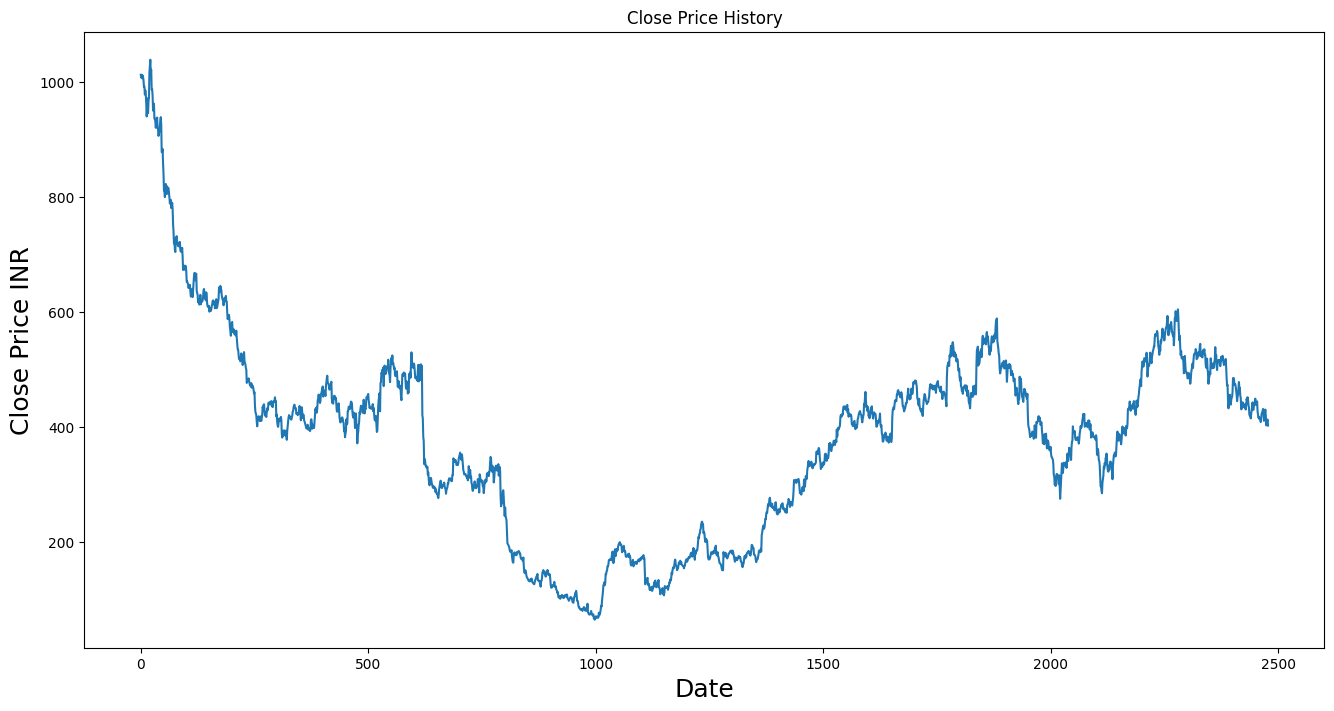

In [22]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['ClosePrice'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [28]:
data = df.filter(['ClosePrice'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1977

In [29]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.973102  ],
       [0.96802012],
       [0.97289667],
       ...,
       [0.35516657],
       [0.35752785],
       [0.34669678]])

In [30]:
train_data = scaled_data[0:training_data_len,:]
train_data.shape
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [31]:
x_train ,y_train = np.array(x_train),np.array(y_train)

In [32]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1917, 60, 1)

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50,return_sequences = False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

In [34]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [37]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
60/60 [==============================] - 3s 46ms/step - loss: 1.1317e-04
Epoch 2/20
60/60 [==============================] - 3s 44ms/step - loss: 1.1102e-04
Epoch 3/20
60/60 [==============================] - 4s 61ms/step - loss: 1.0842e-04
Epoch 4/20
60/60 [==============================] - 3s 44ms/step - loss: 1.1437e-04
Epoch 5/20
60/60 [==============================] - 3s 44ms/step - loss: 1.1218e-04
Epoch 6/20
60/60 [==============================] - 3s 43ms/step - loss: 1.2387e-04
Epoch 7/20
60/60 [==============================] - 4s 62ms/step - loss: 1.2336e-04
Epoch 8/20
60/60 [==============================] - 3s 43ms/step - loss: 1.2211e-04
Epoch 9/20
60/60 [==============================] - 3s 44ms/step - loss: 9.8030e-05
Epoch 10/20
60/60 [==============================] - 3s 43ms/step - loss: 1.0818e-04
Epoch 11/20
60/60 [==============================] - 3s 49ms/step - loss: 9.8769e-05
Epoch 12/20
60/60 [==============================] - 3s 56ms/step - loss: 

In [38]:
test_data = scaled_data[training_data_len -60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [39]:
x_test = np.array(x_test)

In [40]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [41]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 3s 34ms/step


In [42]:
df['ClosePrice'].describe()

count    2471.000000
mean      385.754006
std       173.308339
min        65.300000
25%       266.775000
50%       411.200000
75%       480.750000
max      1039.350000
Name: ClosePrice, dtype: float64

In [43]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

10.520200453899026

<ipython-input-46-63b2223abb71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


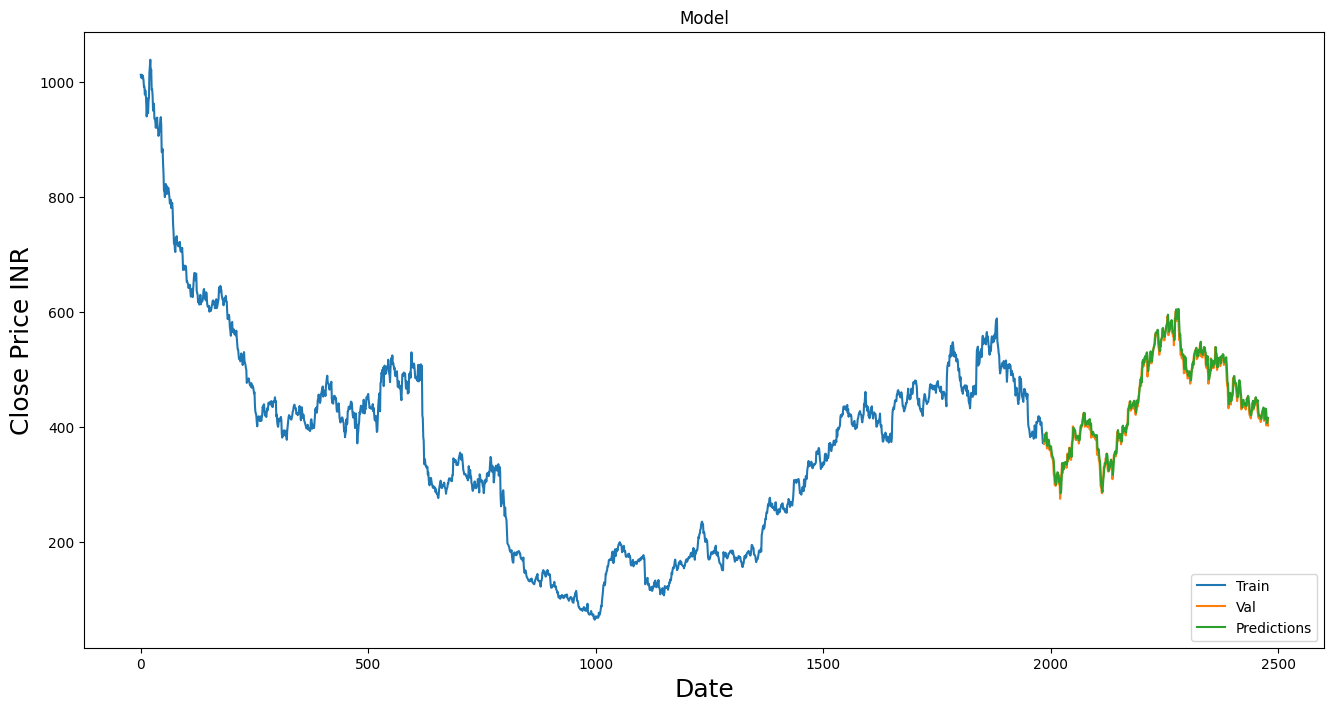

In [46]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['ClosePrice'])
plt.plot(valid[['ClosePrice','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
df1 = df
new_df = df.filter(['ClosePrice'])
last_60_days = new_df[-61:-1].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[416.3621]]


In [49]:
valid

,ClosePrice,Predictions
1985,377.20,376.259430
1986,370.50,378.917084
1987,388.05,375.764160
1988,379.55,386.710571
1989,386.30,385.636932
...,...,...
2474,403.25,428.287842
2475,405.10,411.944000
2476,411.25,407.088806
2477,413.55,411.783386


In [50]:
df1.tail(1)

,Date,OpenPrice,HighPrice,LowPrice,ClosePrice,WAP,Num_Shares,Num_Trades,Total_Turnover,Deliverable_Quantity,DQ_TQ,Spread_HighLow,Spread_CloseOpen
2478,01-Apr-14,403.0,405.55,399.7,403.0,402.323357,534471,6930,215030167,262979.0,49.2,5.85,0.0


In [64]:
import pandas_datareader as web

try:
    real_data = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2024-4-12', end='2024-4-12')
    print(real_data['Close'])
except Exception as e:
    print("An error occurred:", e)


An error occurred: string indices must be integers


In [66]:
df1.tail(-1)

,Date,OpenPrice,HighPrice,LowPrice,ClosePrice,WAP,Num_Shares,Num_Trades,Total_Turnover,Deliverable_Quantity,DQ_TQ,Spread_HighLow,Spread_CloseOpen
1,09-Apr-24,1021.95,1029.60,1005.00,1008.20,1017.412430,343498,9045,349479135,103238.0,30.05,24.60,-13.75
2,08-Apr-24,1010.20,1016.00,1004.05,1012.95,1011.328200,191475,6347,193644067,72492.0,37.86,11.95,2.75
3,05-Apr-24,1012.00,1012.05,1004.45,1007.05,1007.718043,384700,16038,387669131,167781.0,43.61,7.60,-4.95
4,04-Apr-24,1016.00,1017.00,998.25,1012.05,1009.251081,282849,8326,285465659,86785.0,30.68,18.75,-3.95
5,03-Apr-24,1005.00,1014.00,992.25,1009.05,1005.368039,298767,8329,300370793,84179.0,28.18,21.75,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,07-Apr-14,404.00,423.60,400.20,403.25,403.242984,413172,5597,166608710,275160.0,33.30,23.40,-0.75
2475,04-Apr-14,413.65,413.65,404.50,405.10,406.199588,383816,3957,155905901,196095.0,51.09,9.15,-8.55
2476,03-Apr-14,415.05,417.85,406.90,411.25,413.110371,365050,7323,150805941,77397.0,21.20,10.95,-3.80
2477,02-Apr-14,406.00,414.30,405.00,413.55,411.939946,987732,18424,406886267,430986.0,43.63,9.30,7.55
